# Business Understanding

## Project Domain

Domain: Breast Cancer Wisconsin (Diagnostic)
Sub-Domain: Medical Diagnostics & Disease Detection

Sistem deteksi kanker menggunakan data dan model pembelajaran mesin termasuk dalam bidang kesehatan yang memanfaatkan teknologi untuk membantu tenaga medis dalam mendiagnosis penyakit, khususnya kanker payudara. Dataset Breast Cancer Wisconsin (Diagnostic) Data ini berfokus pada analisis fitur-fitur dari biopsi payudara untuk mengklasifikasikan tumor menjadi jinak atau ganas. Dengan memanfaatkan teknik machine learning, sistem ini dapat memberikan rekomendasi diagnosa yang lebih cepat dan akurat, mendukung keputusan medis yang lebih baik dalam perawatan pasien.

## Problem Statements

Pemasalahan:
1. Klasifikasi Tumor Payudara (Benign vs Malignant):

Problem Statement: Mengembangkan model machine learning untuk mengklasifikasikan tumor payudara berdasarkan fitur-fitur biopsi (seperti radius, tekstur, dan perimeter sel) ke dalam dua kategori: jinak dan ganas. Model ini bertujuan untuk membantu tenaga medis dalam mendiagnosis kanker payudara dengan lebih cepat dan akurat.

2. Prediksi Risiko Kanker Payudara Berdasarkan Karakteristik Sel:

Problem Statement: Membuat sistem prediksi risiko kanker payudara menggunakan dataset yang berisi fitur-fitur dari nukleus sel. Sistem ini bertujuan untuk memberikan prediksi mengenai kemungkinan seorang pasien memiliki kanker payudara ganas berdasarkan pola yang ditemukan pada data biopsi.

3. Peningkatan Akurasi Diagnosis Kanker Payudara:

Problem Statement: Meningkatkan akurasi dan kecepatan diagnosis kanker payudara dengan membangun model pembelajaran mesin yang dapat memproses data biopsi dan memberikan diagnosis yang lebih tepat. Proyek ini bertujuan untuk mengurangi kesalahan manusia dalam proses diagnosis dan memberikan rekomendasi berbasis data yang lebih dapat diandalkan.

4. Deteksi Dini Kanker Payudara Menggunakan Data Biopsi:

Problem Statement: Mengembangkan sistem deteksi dini kanker payudara yang menggunakan data biopsi dari tumor payudara untuk mendeteksi potensi keganasan pada tahap awal. Sistem ini diharapkan dapat membantu dalam pencegahan dan pengobatan kanker payudara lebih cepat.

## Goals

1. Membangun model klasifikasi yang akurat untuk tumor jinak dan ganas.

2. Mengoptimalkan algoritma machine learning untuk tugas klasifikasi.

3. Meningkatkan kecepatan dan akurasi diagnosis kanker payudara.

4. Melakukan validasi dan evaluasi model menggunakan metrik seperti akurasi, precision, recall, dan F1-score.

5. Meningkatkan interpretabilitas model menggunakan teknik seperti SHAP.

6. Menerapkan model untuk deteksi dini kanker payudara.

7. Mengurangi false positives dan false negatives untuk meningkatkan keandalan model.

## Solustion Statements

1. Machine Learning Model
Menggunakan Artificial Neural Network (ANN) untuk mengklasifikasikan tanaman berdasarkan dataset yang mencakup parameter tanah dan iklim. Model ini akan dilatih untuk memprediksi jenis tanaman yang paling cocok dengan akurasi tinggi (>90%) berdasarkan kondisi yang diberikan.

2. Aplikasi Web (Streamlit)
Membuat antarmuka berbasis Streamlit yang mudah digunakan oleh petani, memungkinkan mereka untuk memasukkan parameter tanah dan iklim, serta menerima rekomendasi tanaman yang sesuai secara instan.

3. Optimasi dengan TensorFlow Lite
Model machine learning akan dikonversi ke format TensorFlow Lite (TFLite) agar dapat dijalankan dengan efisien pada perangkat dengan sumber daya terbatas, seperti smartphone atau perangkat IoT di lapangan, memungkinkan penggunaan yang lebih luas dan praktis di lingkungan pertanian.

# Data Understanding

## Import Data dari Kaggle

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"isalsequerpenst","key":"e9b373b6e1d8964b7351ea8ae6e8aa92"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [3]:
!kaggle datasets download -d uciml/breast-cancer-wisconsin-data

Dataset URL: https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data
License(s): CC-BY-NC-SA-4.0
  0% 0.00/48.6k [00:00<?, ?B/s]
100% 48.6k/48.6k [00:00<00:00, 221MB/s]


In [4]:
!mkdir breast-cancer-wisconsin-data
!unzip breast-cancer-wisconsin-data.zip -d breast-cancer-wisconsin-data
!ls breast-cancer-wisconsin-data

Archive:  breast-cancer-wisconsin-data.zip
  inflating: breast-cancer-wisconsin-data/data.csv  
data.csv


## Import Library yang dibutuhkan

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import joblib

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

## Exploratory Data Analysis

In [6]:
df = pd.read_csv('/content/breast-cancer-wisconsin-data/data.csv')

In [7]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
df = df.drop(columns=['id', 'Unnamed: 32'])

# Data Preparation

In [9]:
le = LabelEncoder()
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

In [10]:
selected_features = [
    'concave points_worst',
    'perimeter_worst',
    'concave points_mean',
    'radius_worst',
    'perimeter_mean',
    'area_worst',
    'radius_mean',
    'area_mean',
    'concavity_mean',
    'concavity_worst'
]

X = df[selected_features]
y = df['diagnosis']

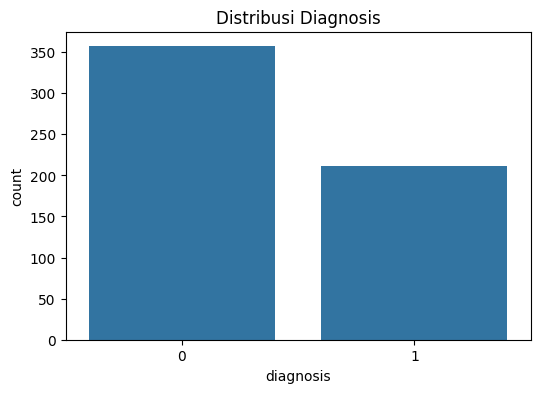

In [11]:
# Distribusi diagnosis
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='diagnosis')
plt.title('Distribusi Diagnosis')
plt.show()

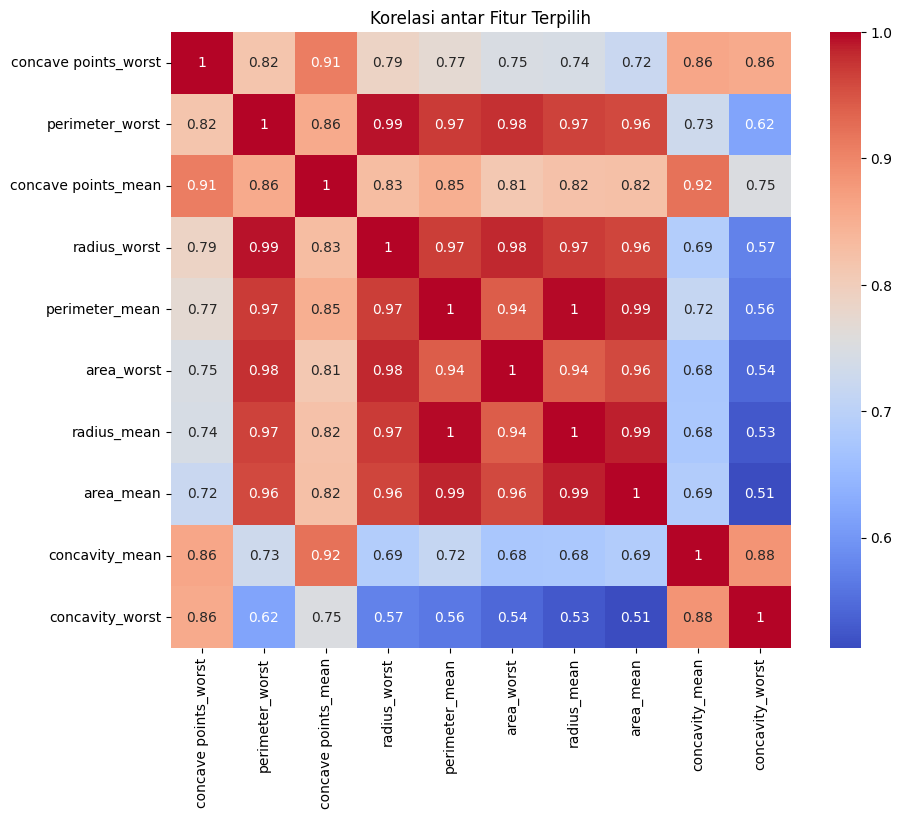

In [12]:
# Korelasi antar fitur
plt.figure(figsize=(10,8))
sns.heatmap(df[selected_features].corr(), annot=True, cmap='coolwarm')
plt.title('Korelasi antar Fitur Terpilih')
plt.show()

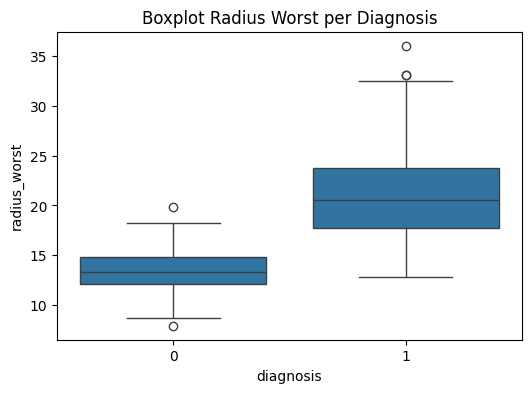

In [13]:
# Perbandingan radius_worst berdasarkan diagnosis
plt.figure(figsize=(6,4))
sns.boxplot(x='diagnosis', y='radius_worst', data=df)
plt.title('Boxplot Radius Worst per Diagnosis')
plt.show()

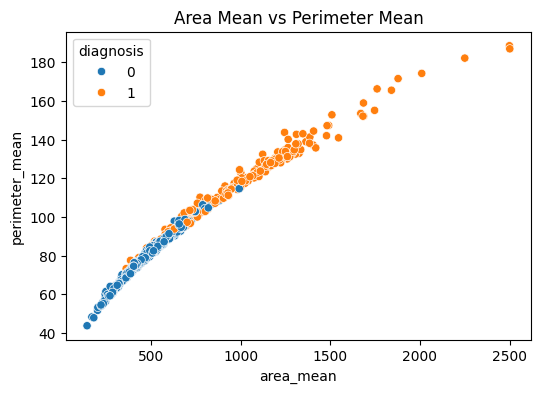

In [14]:
# Scatter plot area_mean vs perimeter_mean
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='area_mean', y='perimeter_mean', hue='diagnosis')
plt.title('Area Mean vs Perimeter Mean')
plt.show()

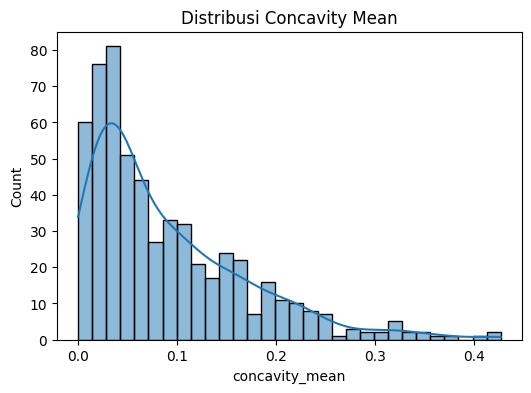

In [15]:
# Distribusi concavity_mean
plt.figure(figsize=(6,4))
sns.histplot(df['concavity_mean'], kde=True, bins=30)
plt.title('Distribusi Concavity Mean')
plt.show()

In [16]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Modeling

In [18]:
model = Sequential()
model.add(Dense(16, input_dim=10, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │           176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 321 (1.25 KB)

 Trainable params: 321 (1.25 KB)

 Non-trainable params: 0 (0.00 B)

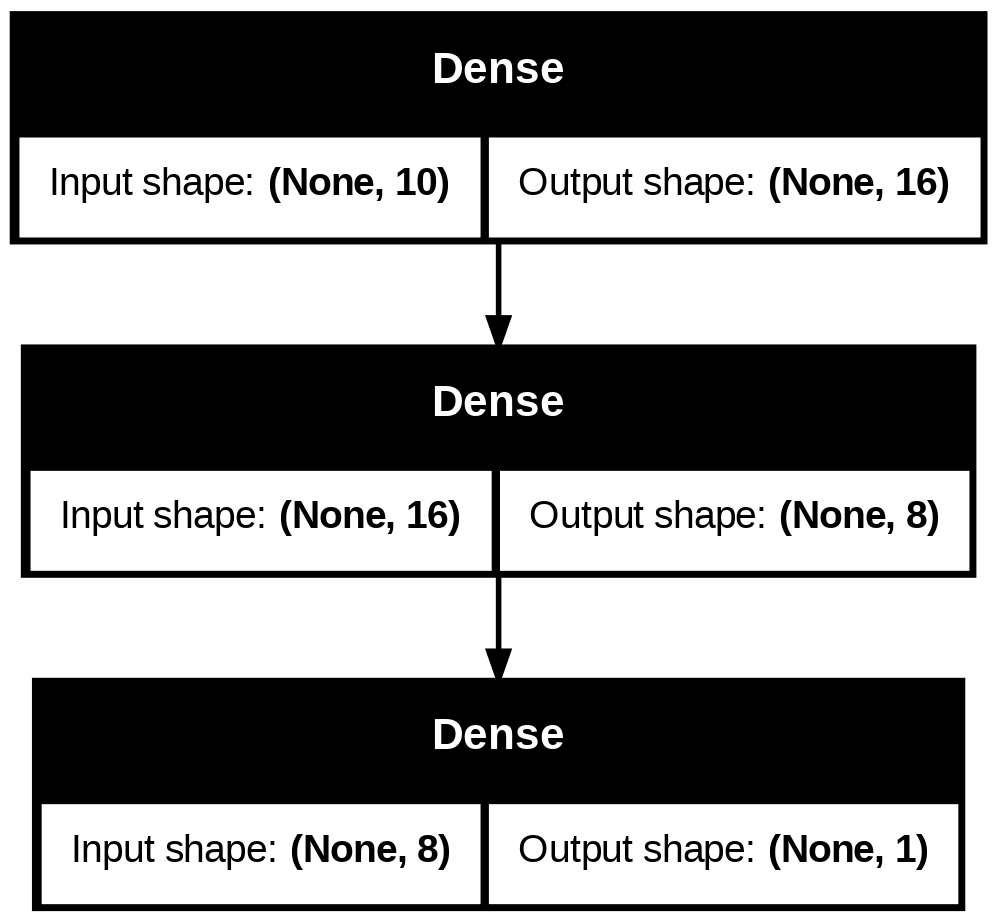

In [21]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes = True)

In [22]:
history = model.fit(X_train,
                    y_train,
                    epochs=50,
                    batch_size=16,
                    validation_data=(X_test, y_test))

Epoch 1/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - accuracy: 0.6115 - loss: 0.7245 - val_accuracy: 0.6228 - val_loss: 0.6953
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5985 - loss: 0.6895 - val_accuracy: 0.7719 - val_loss: 0.6542
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8197 - loss: 0.6449 - val_accuracy: 0.9474 - val_loss: 0.6027
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9228 - loss: 0.5922 - val_accuracy: 0.9474 - val_loss: 0.5417
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9353 - loss: 0.5353 - val_accuracy: 0.9386 - val_loss: 0.4759
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9499 - loss: 0.4649 - val_accuracy: 0.9474 - val_loss: 0.4079
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9301 - loss: 0.4082 - val_accuracy: 0.9474 - val_loss: 0.3455
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9255 - loss: 0.3593 - val_accuracy: 0.9474 - val_loss

# Evaluation

In [23]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Akurasi Model: {test_accuracy:.4f}")
print(f"Loss Model: {test_loss:.4f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - accuracy: 0.9610 - loss: 0.0700
Akurasi Model: 0.9649
Loss Model: 0.0728


In [24]:
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

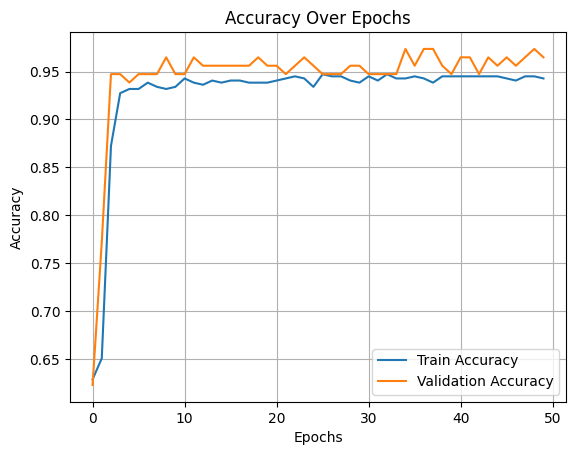

In [25]:
# Plot akurasi training vs. validation
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

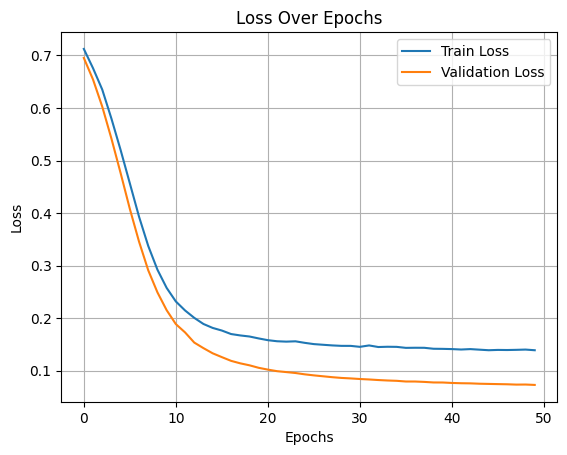

In [26]:
# Plot akurasi training vs. validation
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


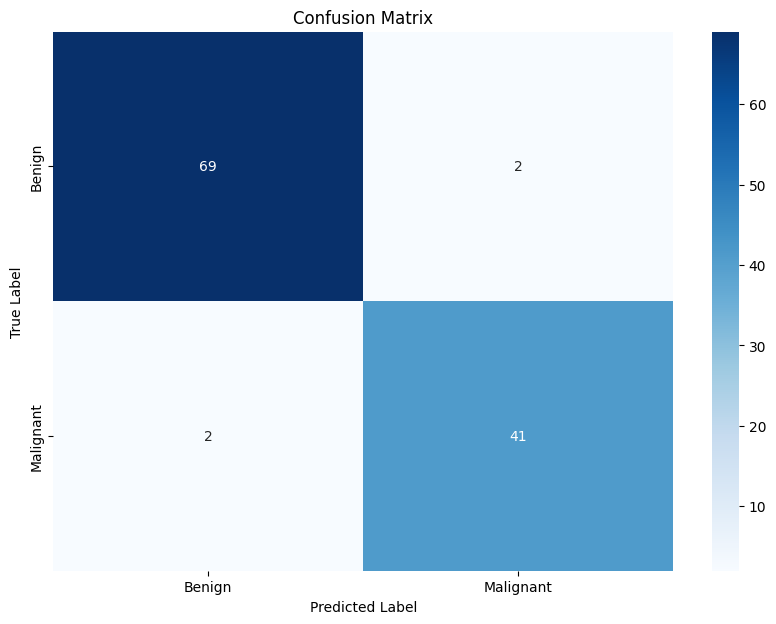

[[69  2]
 [ 2 41]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        71
           1       0.95      0.95      0.95        43

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



In [27]:
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype("int32")

cm = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

print(cm)
print(classification_report(y_test, y_pred_classes))

# Deployment

## Model Simulation

In [28]:
sample_input = np.array([[0.1, 120.0, 0.08, 16.0, 85.0, 880.0, 14.0, 600.0, 0.12, 0.35]])
print("\nSample Input (Original):")
print(sample_input)


Sample Input (Original):
[[1.0e-01 1.2e+02 8.0e-02 1.6e+01 8.5e+01 8.8e+02 1.4e+01 6.0e+02 1.2e-01
  3.5e-01]]


In [29]:
sample_input_scaled = scaler.transform(sample_input)
print("\nSample Input (Scaled):")
print(sample_input_scaled)


Sample Input (Scaled):
[[0.34364261 0.34658101 0.39761431 0.28708645 0.28477645 0.17076288
  0.33219745 0.19363733 0.28116214 0.27955272]]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [30]:
predicted = model.predict(sample_input_scaled)
result = "Ganas (Malignant)" if predicted[0][0] > 0.5 else "Jinak (Benign)"

print("\nPredicted Diagnosis:")
print(result)
print(f"Probability: {predicted[0][0]:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step

Predicted Diagnosis:
Ganas (Malignant)
Probability: 0.8104


## Save Model

In [31]:
joblib.dump(scaler, "scaler.pkl")

joblib.dump(le, "label_encode.pkl")

model.save("model.h5")

In [32]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
with open("breast_cancer_diagnosis.tflite", "wb") as f:
    f.write(tflite_model)

print("\nModel, scaler, label encoder, and TFLite model saved successfully.")

Saved artifact at '/tmp/tmpg39_h59x'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 10), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  136665441891344: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136665441894224: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136665441893456: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136665441890576: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136665331090256: TensorSpec(shape=(), dtype=tf.resource, name=None)
  136665441891728: TensorSpec(shape=(), dtype=tf.resource, name=None)

Model, scaler, label encoder, and TFLite model saved successfully.
